# Offset Extraction
***
Determine the offset basedon measurements of hydrogen

In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


from scipy.signal import find_peaks

In [10]:
#Get Data
cols = ["wavelength", "intensity"]
raw_data1 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point1_300_900_nm.txt", delimiter="\t", names=cols)
raw_data2 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_2.txt", delimiter="\t", names=cols)
raw_data3 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_3.txt", delimiter="\t", names=cols)
raw_data4 = pd.read_csv("DataFiles/Hydrogen_Test_slit_bigger_300_900_nm_run_1.txt", delimiter="\t", names=cols)
raw_data5 = pd.read_csv("DataFiles/Hydrogen_Test_slit_bigger_300_900_nm_run_multi_1.txt", delimiter="\t", names=cols)
raw_data6 = pd.read_csv("DataFiles/Hydrogen_slit_Smaller_300_900_nm_run_multi_1_v2.txt", delimiter="\t", names=cols)
raw_data7 = pd.read_csv("DataFiles/Hydrogen_slit_Smaller_300_900_nm_run_multi_1_v3.txt", delimiter="\t", names=cols)
raw_data8 = pd.read_csv("DataFiles/Hydrogen_slit_bigger_300_900_nm_run_multi_3_v5.txt", delimiter="\t", names=cols)


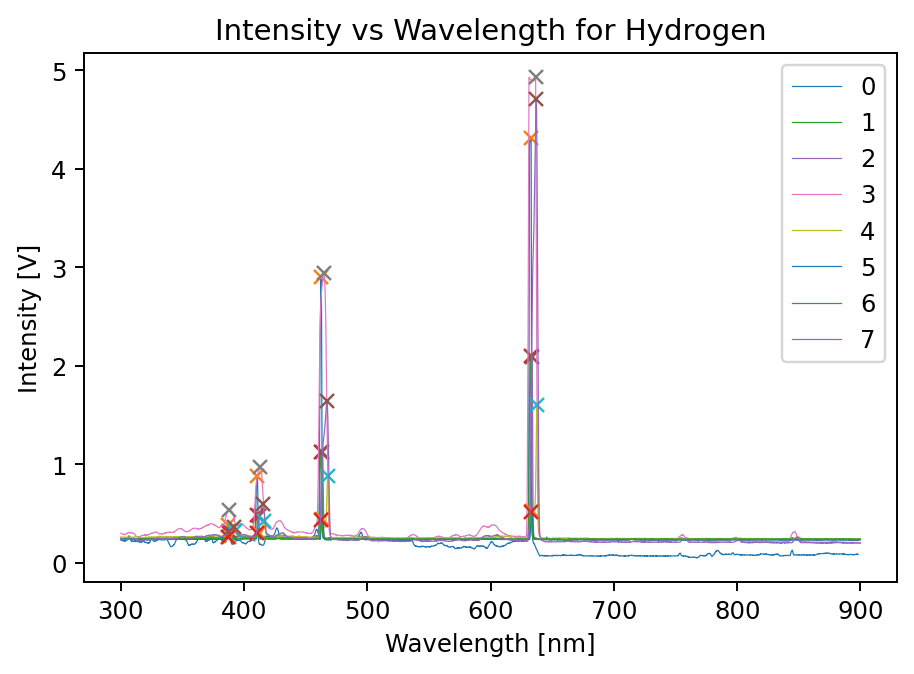

In [12]:
#Get Peaks & Plot
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Hydrogen")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

proms = [0.15, 0.051, 0.051, 0.15, 0.05, 0.02, 0.01, 0.1]
data_files = [raw_data1, raw_data2, raw_data3, raw_data4, raw_data5, raw_data6, raw_data7, raw_data8]
expected = np.array([656.2, 486.1, 434.0, 410.1])

peak_pos = []
peak_intensity = []
peak_diff = []

scaling = [0.5,0,0,-.2,-.2, -.20, -.20, -.20]

i=0
for raw_data in data_files:
    peaks, properties = find_peaks(raw_data["intensity"], height=0, prominence=proms[i], distance=50, width=5)

    plt.plot(raw_data["wavelength"], raw_data["intensity"]-scaling[i], lw=.5, label=i)
    plt.plot(raw_data["wavelength"][peaks], raw_data["intensity"][peaks]-scaling[i], "x")
    
    peak_pos.append(np.sort(raw_data["wavelength"][peaks]))
    #peak_intensity.append(raw_data["intensity"][peaks])
    peak_diff.append(np.sort(expected) - np.sort(raw_data["wavelength"][peaks]))
    
    i+=1
plt.legend()
#plt.ylim(0,1)

In [13]:
peak_data = np.column_stack((np.array(peak_pos).flatten(), 
                             #np.array(peak_intensity).flatten(), 
                             np.array(peak_diff).flatten(), 
                             np.array([4*[1], 4*[2], 4*[3], 4*[4], 4*[5], 4*[6], 4*[7], 4*[8]]
                                     ).flatten()))

peak_data

array([[387.125,  22.975,   1.   ],
       [410.75 ,  23.25 ,   1.   ],
       [462.5  ,  23.6  ,   1.   ],
       [632.75 ,  23.45 ,   1.   ],
       [387.   ,  23.1  ,   2.   ],
       [410.625,  23.375,   2.   ],
       [462.5  ,  23.6  ,   2.   ],
       [632.375,  23.825,   2.   ],
       [388.125,  21.975,   3.   ],
       [411.75 ,  22.25 ,   3.   ],
       [463.625,  22.475,   3.   ],
       [633.5  ,  22.7  ,   3.   ],
       [388.   ,  22.1  ,   4.   ],
       [413.125,  20.875,   4.   ],
       [464.75 ,  21.35 ,   4.   ],
       [636.5  ,  19.7  ,   4.   ],
       [392.375,  17.725,   5.   ],
       [416.25 ,  17.75 ,   5.   ],
       [468.   ,  18.1  ,   5.   ],
       [637.75 ,  18.45 ,   5.   ],
       [387.875,  22.225,   6.   ],
       [411.75 ,  22.25 ,   6.   ],
       [463.5  ,  22.6  ,   6.   ],
       [633.5  ,  22.7  ,   6.   ],
       [387.25 ,  22.85 ,   7.   ],
       [410.875,  23.125,   7.   ],
       [462.75 ,  23.35 ,   7.   ],
       [632.625,  23.575,   

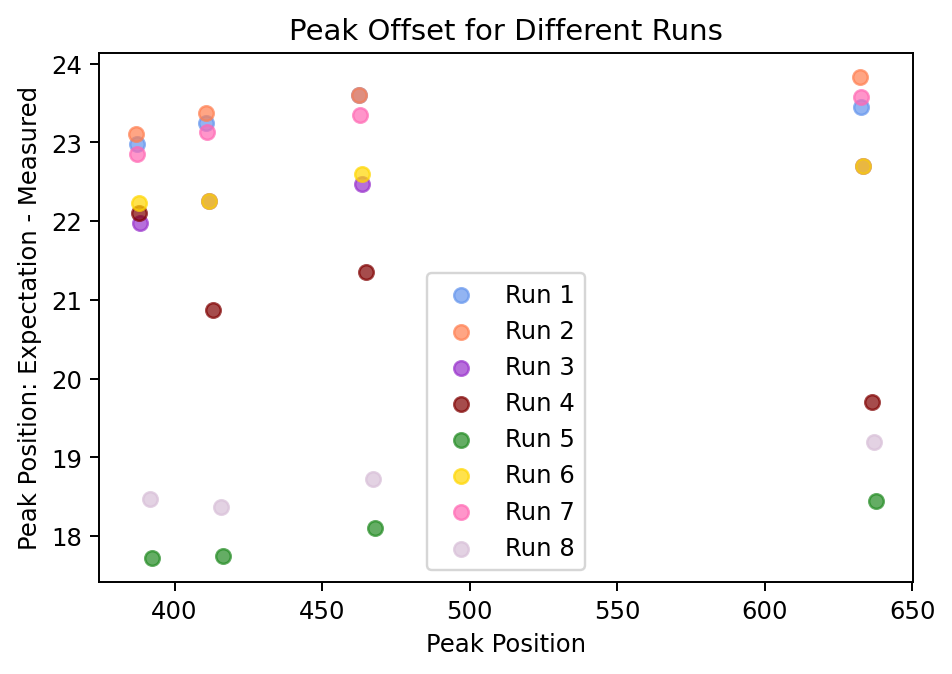

In [15]:
plt.figure(dpi=175)
plt.title("Peak Offset for Different Runs")
plt.ylabel("Peak Position: Expectation - Measured")
plt.xlabel("Peak Position")
colors = ["cornflowerblue","coral","darkorchid","maroon","forestgreen","gold","hotpink","thistle"]
#run_labels = 

#flat_colors = [item for sublist in colors for item in sublist]

for i in range(len(colors)):
    plt.scatter(peak_data[4*i:4*(i+1),0], peak_data[4*i:4*(i+1),1], c=colors[i], alpha=0.7, label=f"Run {i+1}")#[peak_data[:,2]-1])

plt.legend()

In [6]:
peak_data[4*2:4*(2+1),1] - peak_data[4*1:4*(1+1),1]

array([-1.125, -1.125, -1.125, -1.125])

In [7]:
peak_data[:,2]-1

array([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4.,
       4., 4., 4., 5., 5., 5., 5., 6., 6., 6., 6.])

In [59]:
colors

['cornflowerblue', 'coral', 'darkorchid']